# Example on the urban canopy data 

In [ ]:
from pivpy import io, graphics, pivpy
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pkg_resources as pkg
%matplotlib inline
from lvreader import read_buffer
import pathlib


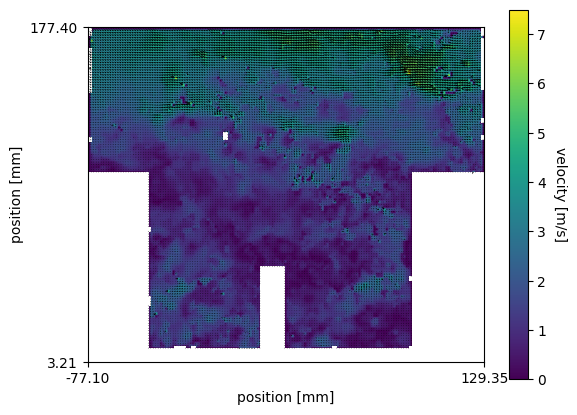

In [ ]:
filename = pathlib.Path(pkg.resource_filename('pivpy','data/urban_canopy/B00001.vc7'))
buffer = read_buffer(str(filename))
buffer.plot()

In [ ]:
ds = io.load_vc7(filename)

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (x: 160, y: 135, t: 1)
Coordinates:
  * x        (x) float64 -76.45 -75.16 -73.87 -72.58 ... 124.8 126.1 127.4 128.7
  * y        (y) float64 176.8 175.5 174.2 172.9 ... 7.727 6.437 5.146 3.856
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    v        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chc      (y, x, t) bool True False False False False ... True True True True
Attributes: (3)

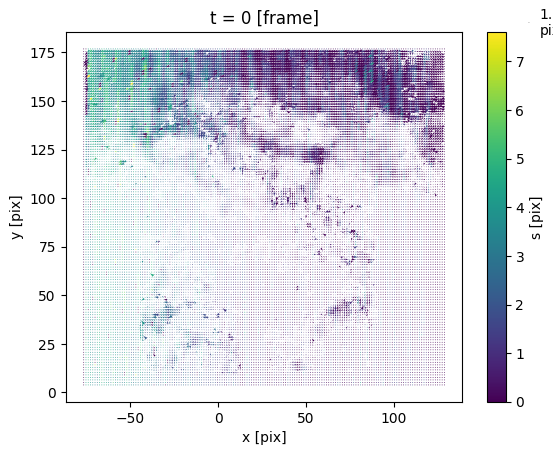

In [ ]:
ds["s"] = np.sqrt(ds["u"]**2 + ds["v"]**2)
ds.isel(t=0).plot.quiver(x='x',y='y',u='u',v='v',hue='s')

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (x: 160, y: 135, t: 1)
Coordinates:
  * x        (x) float64 -76.45 -75.16 -73.87 -72.58 ... 124.8 126.1 127.4 128.7
  * y        (y) float64 176.8 175.5 174.2 172.9 ... 7.727 6.437 5.146 3.856
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    v        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chc      (y, x, t) bool True False False False False ... True True True True
    s        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (3)

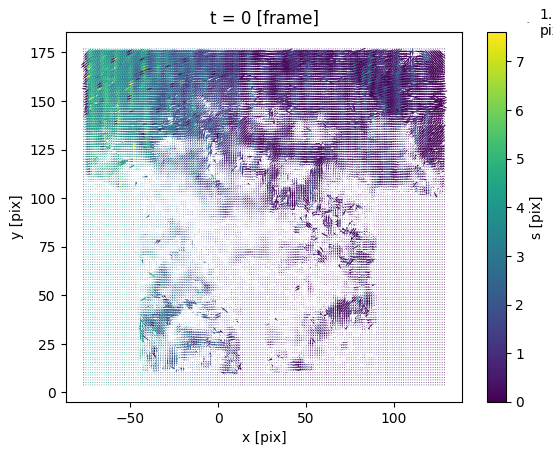

In [ ]:
plt.figure()
# graphics.quiver(ds.isel(t=-1),arrScale=50) # show last
ds.isel(t=0).plot.quiver(
            x='x',
            y='y',
            u='u',
            v='v',
            hue='s',
            units='width',
            scale=np.max(ds['s'].values * 25),
            headwidth=2,
            )

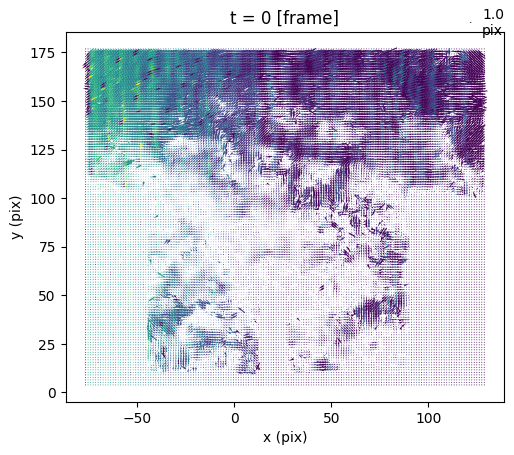

In [8]:
ds.isel(t=0).piv.quiver(colorbar=False);

In [9]:
ds

<xarray.Dataset>
Dimensions:  (x: 160, y: 135, t: 1)
Coordinates:
  * x        (x) float64 -76.45 -75.16 -73.87 -72.58 ... 124.8 126.1 127.4 128.7
  * y        (y) float64 176.8 175.5 174.2 172.9 ... 7.727 6.437 5.146 3.856
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    v        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    chc      (y, x, t) bool True False False False False ... True True True True
    s        (y, x, t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (3)

In [10]:
ds = io.load_directory(filename.parent, ext='vc7')

found 5 files


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='x (pix)', ylabel='y (pix)'>)

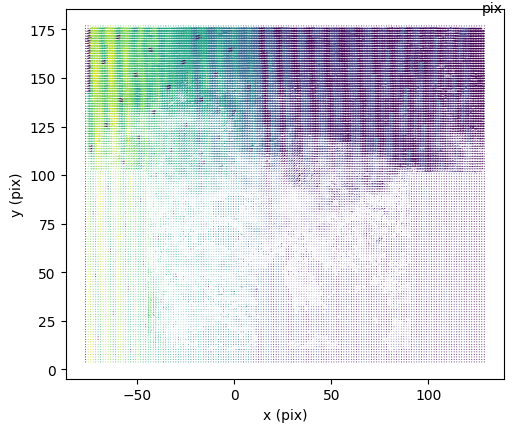

In [11]:
graphics.quiver(ds.piv.average,arrScale=50)

Text(0, 0.5, 'z (mm)')

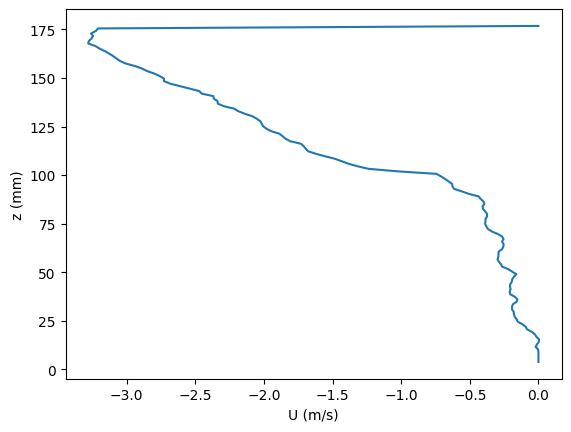

In [12]:
# Let's try vertical profile of streamwise mean velocity U(z)
# we could define it a shortcut of the type:
# graphics.profile(velocity_component = 'u', coordinate = 'z') 
plt.plot(ds.mean(dim='x').mean(dim='t').u,ds.y)
plt.xlabel('U (m/s)')
plt.ylabel('z (mm)')

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'t = 0 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

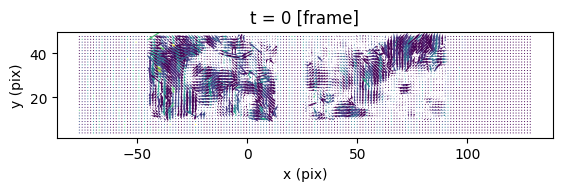

In [13]:
graphics.quiver(ds[dict(y=slice(100, 175))].isel(t=0))
# something strange with the mask

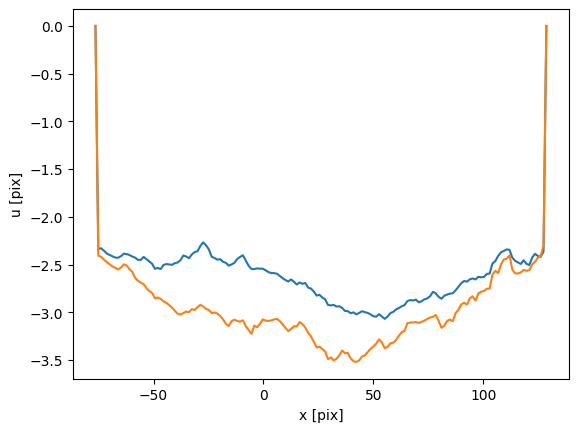

In [14]:
# let's test homogeneity above the canopy: 
# take y above some value and .mean(dim='y')
# take mean with time .mean(dim='t')
# plot:
ds.where(ds.y>120,drop=True).mean(dim='t').mean(dim='y').u.plot()
ds.where(ds.y>150,drop=True).mean(dim='t').mean(dim='y').u.plot()

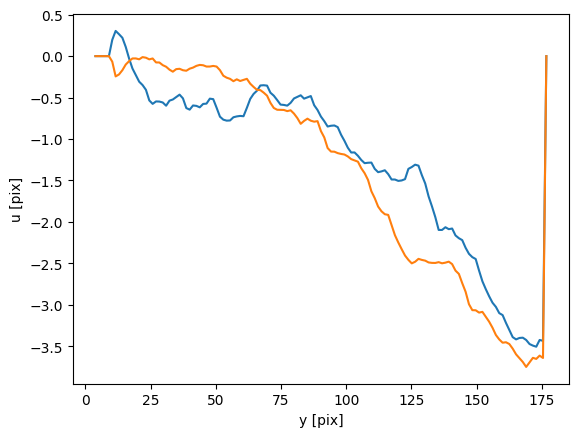

In [15]:
ds.where((ds.x > -40) & (ds.x < 0), drop=True).mean(dim='t').u.mean(dim='x').plot()
ds.where((ds.x > 20) & (ds.x < 80), drop=True).mean(dim='t').u.mean(dim='x').plot()

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='x (mm)', ylabel='y (mm)'>)

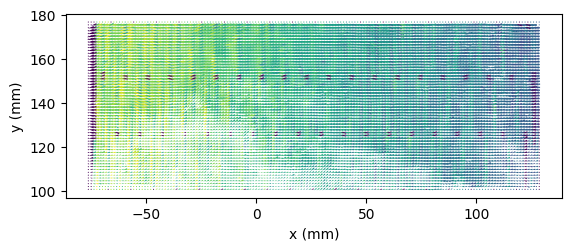

In [16]:
graphics.quiver(ds.where(ds.y>100,drop=True).mean(dim='t'),units=['mm','mm','m/s','m/s'],arrScale=50)

In [21]:
ds["s"] = np.sqrt(ds["u"]**2+ds["v"]**2)
ds.isel(t=0)["s"].plot.contourf(x='x',y='y')

IndexError: tuple index out of range

AttributeError: 'DataArray' object has no attribute 'piv'

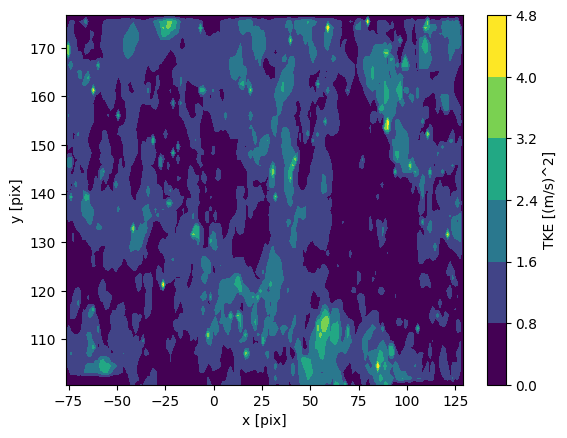

In [17]:
# and some cool plot of average TKE above the canopy 
graphics.contour_plot(ds.piv.tke().mean(dim='t').where(ds.y > 100,drop=True))